# CSE1904 Capstone Project 

### Author: ASHWANI PRASAD
### Register No.: 19BCE1873
### Guide: DR. KARMEL A

## Project Title: Detection of DoS Attacks in Wireless Sensor Networks using Evolutionary Algorithms and Machine Learning

In [1]:
# Importing Python libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from sklearn.model_selection import cross_val_score
from time import time

#### MODULE 1: Data Pre-processing 

In [2]:
# Loading the dataset and viewing it
wsn_ds = pd.read_csv('WSN-DS.csv')
wsn_ds

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [3]:
# Basic information of the dataset
wsn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               374661 non-null  int64  
 1   Time             374661 non-null  int64  
 2   Is_CH            374661 non-null  int64  
 3   who CH           374661 non-null  int64  
 4   Dist_To_CH       374661 non-null  float64
 5   ADV_S            374661 non-null  int64  
 6   ADV_R            374661 non-null  int64  
 7   JOIN_S           374661 non-null  int64  
 8   JOIN_R           374661 non-null  int64  
 9   SCH_S            374661 non-null  int64  
 10  SCH_R            374661 non-null  int64  
 11  Rank             374661 non-null  int64  
 12  DATA_S           374661 non-null  int64  
 13  DATA_R           374661 non-null  int64  
 14  Data_Sent_To_BS  374661 non-null  int64  
 15  dist_CH_To_BS    374661 non-null  float64
 16  send_code        374661 non-null  int6

In [4]:
# describe() function gives the basic numerical infomation about the data for each numeric feature..
wsn_ds.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [5]:
# Checking for NA values
wsn_ds.isna()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Checking for Null values
wsn_ds.isnull()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
374659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Data points count value for each class labels..
wsn_ds['Attack type'].value_counts()

Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: Attack type, dtype: int64

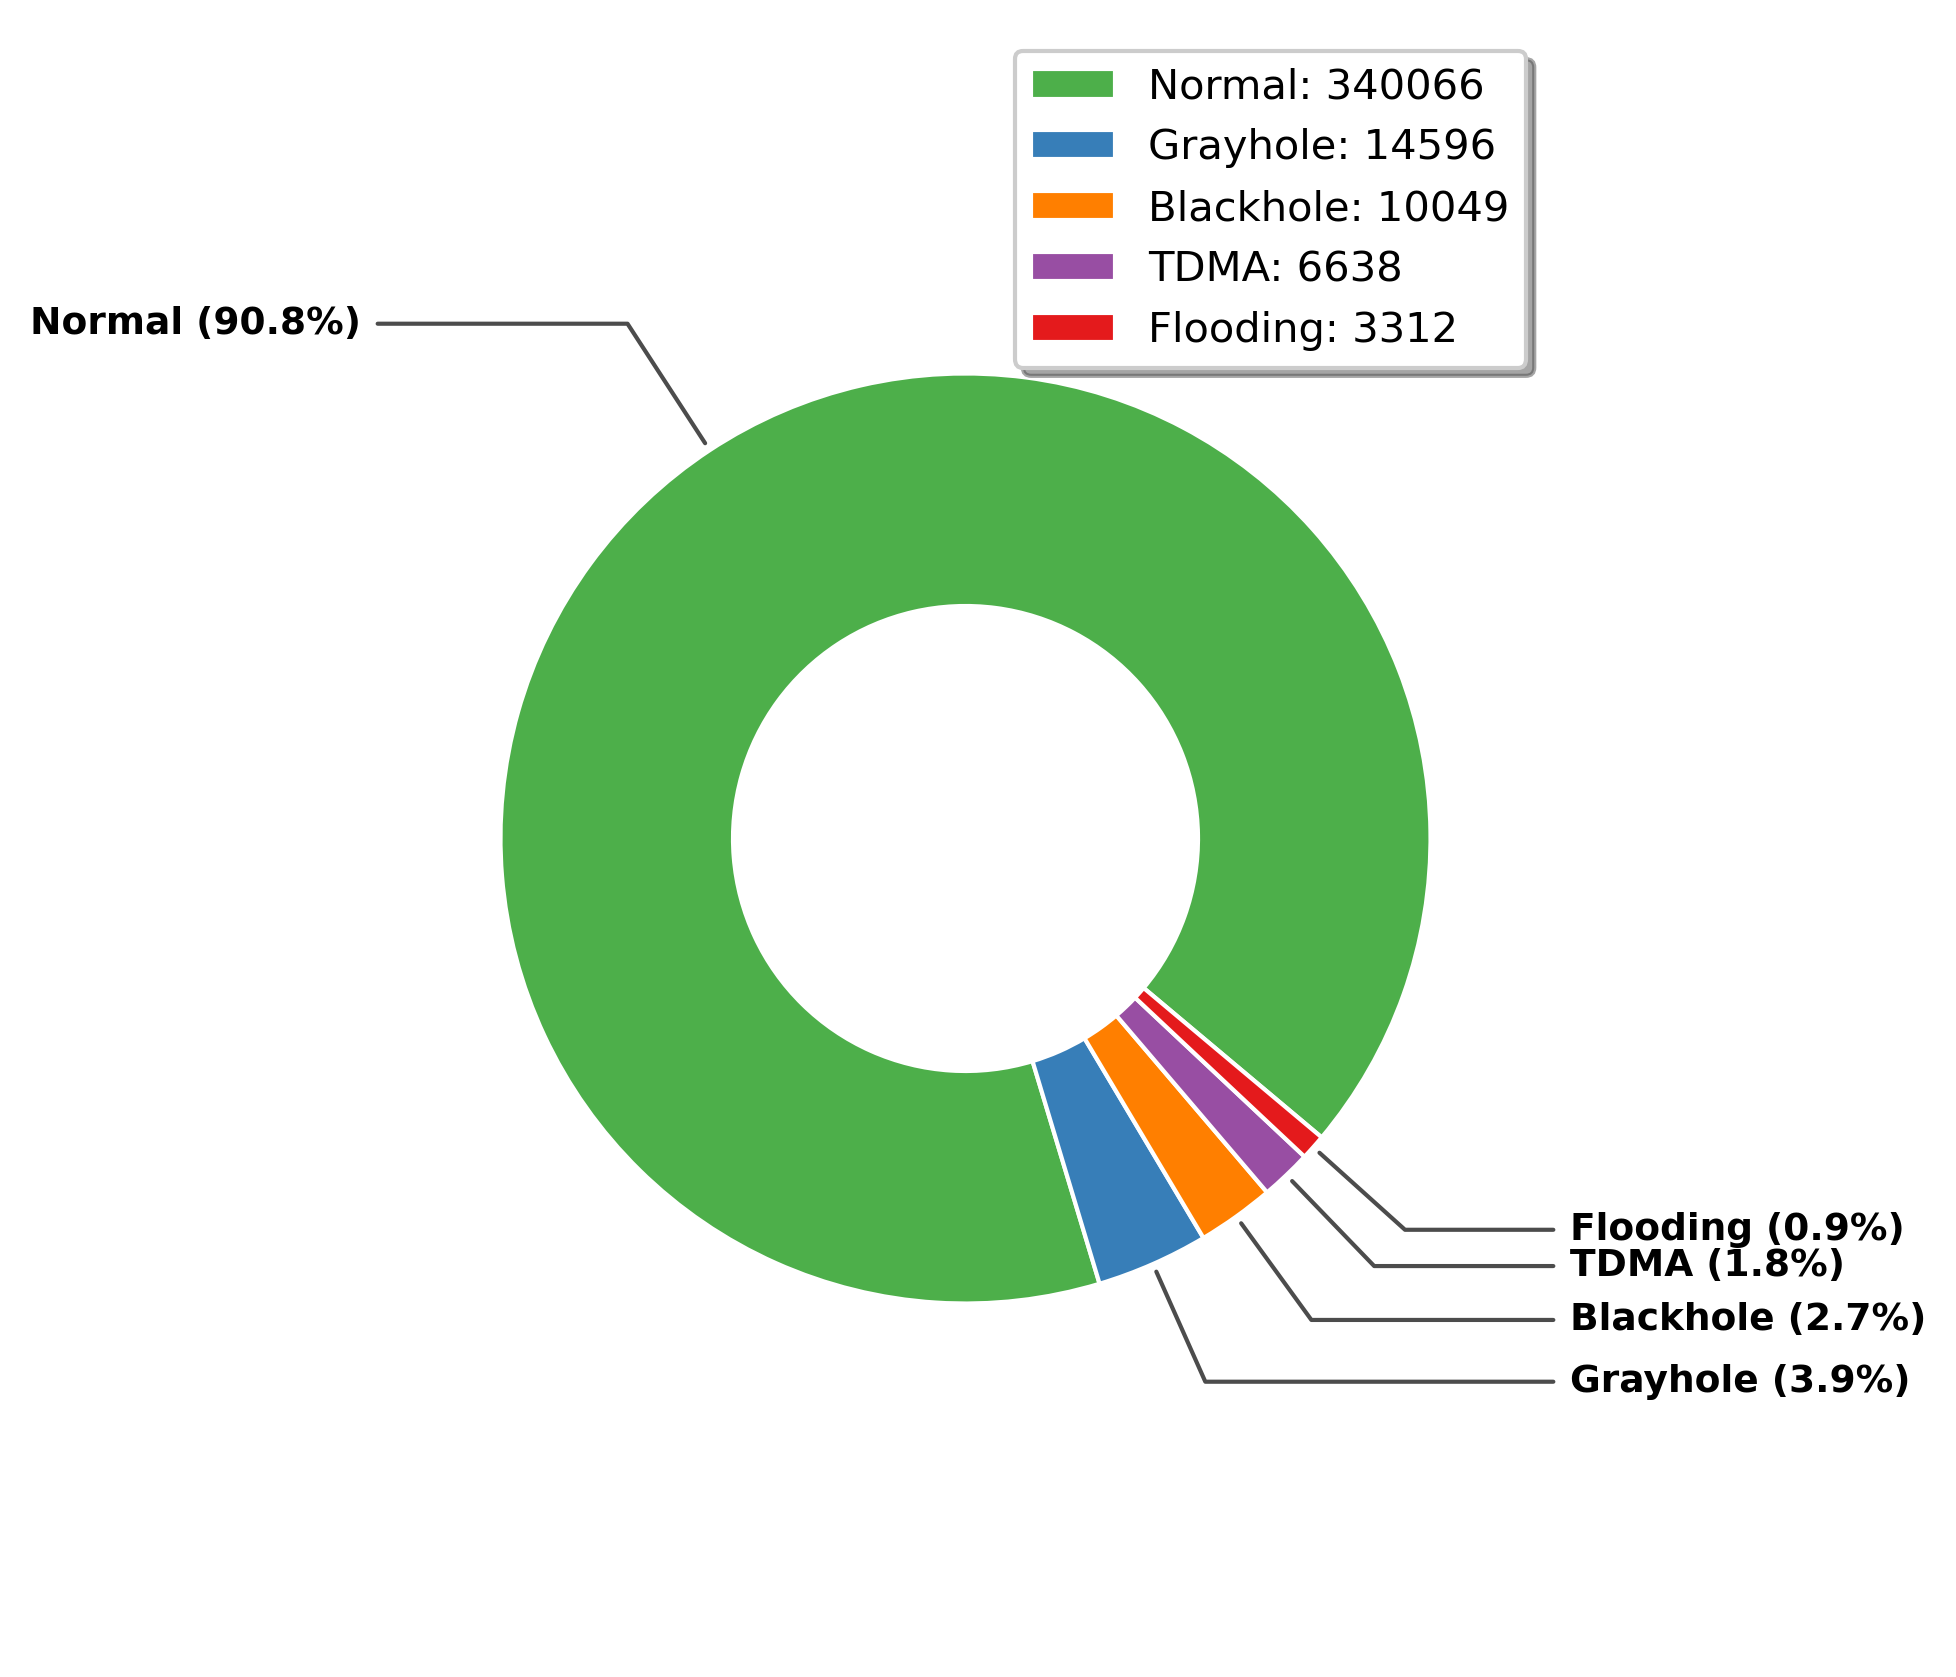

In [8]:
# Visualizing the WSN-DS Attack type distrubution through a donut chart

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# Define data and labels
data = [340066, 14596, 10049, 6638, 3312]
labels = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Calculate percentages
total = sum(data)
percentages = [(d / total) * 100 for d in data]

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 7))
ax.axis('equal')

# Define the colors
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c']

# Define the wedge properties
wedgeprops = {'width': 0.5, 'edgecolor': 'w'}

# Create the pie chart
wedges, _ = ax.pie(data, wedgeprops=wedgeprops, startangle=-40, colors=colors)

# Set up the annotation parameters
annotation_params = {'arrowprops': {'arrowstyle': '-', 'lw': 1, 'alpha': 0.7, 'color': 'black'},
                     'fontsize': 9, 'fontweight': 'bold', 'color': 'k'}

# Add the labels with annotations
for i, (wedge, label, percentage) in enumerate(zip(wedges, labels, percentages)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = f'angle,angleA=0,angleB={angle:.0f}'
    annotation_params['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(f'{label} ({percentage:.1f}%)', xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y), 
                horizontalalignment=horizontalalignment, **annotation_params)
    
# Add a legend
legend_labels = [f"{label}: {data_value}" for label, data_value in zip(labels, data)]
ax.legend(wedges, legend_labels, loc='best', shadow=True, fancybox=True)

# Show the plot
plt.show()


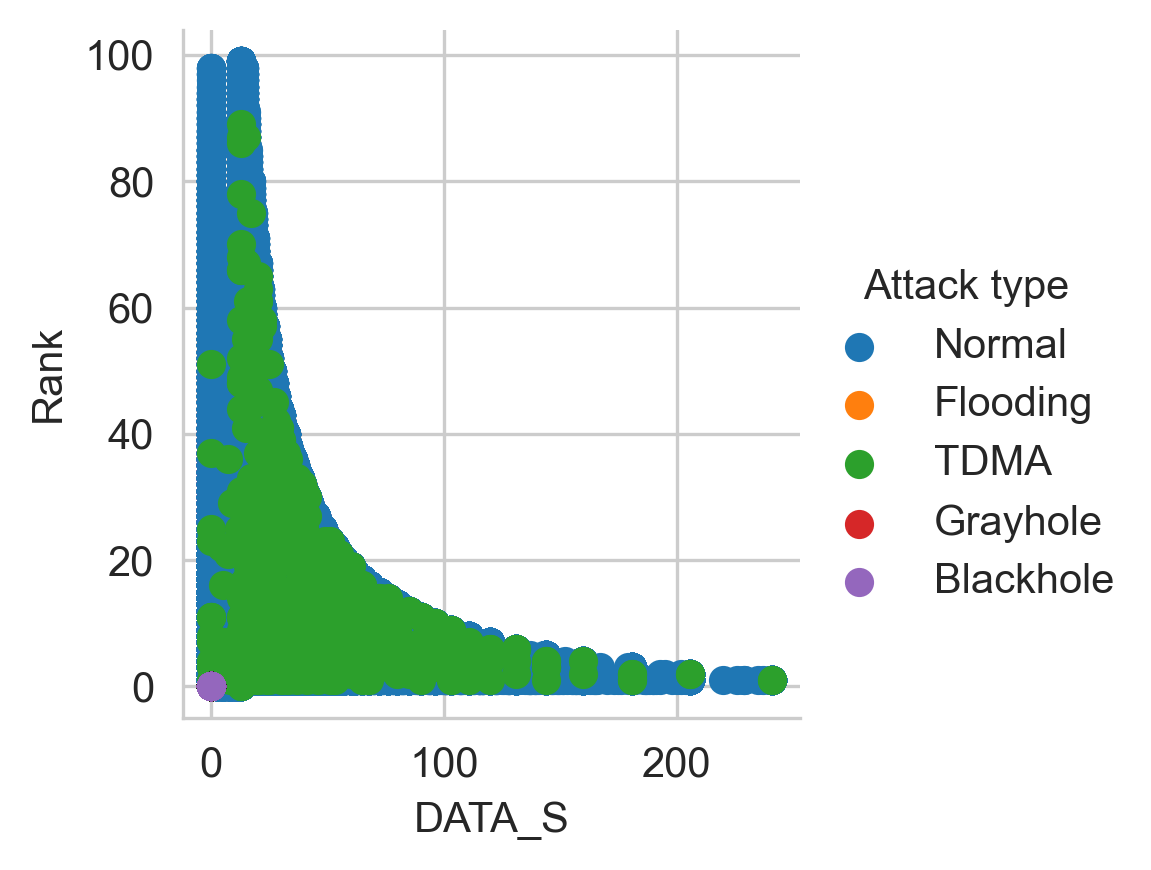

In [9]:
#Visualizing WSN dataset 
# Using Seaborn library to visualize 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(wsn_ds, hue = 'Attack type')\
    .map(plt.scatter, 'DATA_S', 'Rank') \
    .add_legend()

plt.show()

In [10]:
# Shape of the updated dataset
wsn_ds.shape

(374661, 19)

In [11]:
# Variables are categorized into input/independent variables and a target/output variable.

# Input variables (X)
X = wsn_ds[['id','Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'ADV_R', 'JOIN_S', 'JOIN_R', 'SCH_S', 'SCH_R', 'Rank','send_code', 
           'DATA_S','DATA_R', 'Data_Sent_To_BS', 'dist_CH_To_BS', 'Expaned Energy']]

# Target variable (y)
y = wsn_ds['Attack type']

In [12]:
# Define the number of features to select for dimensionality reduction by Evolutionary Algorithms

# To reduce the overhead on WSNs, only 4 features would be considered
num_features = 4

In [13]:
# Split the dataset into training and test sets

# Ratio of dataset split: 80% for training and remaining 20% for testing purposes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Table to show Dataset separated 80% training set and 20% testing sets

# Get the value counts of each attack type in the training set
train_counts = y_train.value_counts()

# Get the value counts of each attack type in the testing set
test_counts = y_test.value_counts()

# Create a new dataframe to hold the results
results = pd.DataFrame({
    'Attack Type': train_counts.index,
    'Training Set': train_counts.values,
    'Testing Set': test_counts.values
})

# Add a row to the dataframe to show the total number of samples in each set
results.loc['Total'] = ['All', len(X_train), len(X_test)]

# Print the results dataframe
print(results.to_string(index=False))



Attack Type  Training Set  Testing Set
     Normal        272101        67965
   Grayhole         11594         3002
  Blackhole          8025         2024
       TDMA          5352         1286
   Flooding          2656          656
        All        299728        74933


### Balancing the Imbalanced Data

In [15]:
from imblearn.over_sampling import ADASYN
# apply ADASYN to balance the data
adasyn = ADASYN()
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

### Building the Anomaly Detection Model for Detection of DoS attacks in WSNs

#### MODULE 2: Dimensionality Reduction Using Evolutionary Algorithms

In [22]:
# 1. GRASSHOPPER OPTIMIZATION ALGORITHM (GOA)

# Define fitness function
def fitness(X_train, X_test, y_train, y_test, feature_mask):
    # Select features based on feature mask
    X_train_subset = X_train.iloc[:, feature_mask]
    X_test_subset = X_test.iloc[:, feature_mask]

    # Train and evaluate model using selected features
    model = DecisionTreeClassifier()
    model.fit(X_train_subset, y_train)
    score = model.score(X_test_subset, y_test)

    return score

# Define Grasshopper Optimization Algorithm
def grasshopper_optimization_algorithm(X_train, X_test, y_train, y_test, num_agents, max_iter, lb, ub):
    # Initialize agents' positions randomly
    positions = np.random.uniform(low=lb, high=ub, size=(num_agents, X_train.shape[1]))

    # Initialize best position and score
    best_position = None
    best_score = -1

    start_time = time()
    # Loop over iterations
    for iteration in range(max_iter):
        # Evaluate fitness of all agents
        scores = [fitness(X_train, X_test, y_train, y_test, feature_mask=np.round(position).astype(bool)) for position in positions]

        # Update best position and score
        best_index = np.argmax(scores)
        if scores[best_index] > best_score:
            best_position = positions[best_index]
            best_score = scores[best_index]

        # Update agents' positions using Grasshopper formula
        c = 1.0
        epsilon = 0.01
        alpha = 0.1
        r = np.random.uniform(low=0, high=1, size=num_agents)
        c_norm = c / np.sqrt(iteration+1)
        s = np.zeros((num_agents, X_train.shape[1]))
        for i in range(num_agents):
            for j in range(num_agents):
                if i != j:
                    s[i] += (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
            s[i] = s[i] / (num_agents-1)
            xichma = np.sqrt(np.sum(np.power(s[i], 2))) * r[i]
            delta_pos = c_norm * s[i] * np.exp(-1 * alpha * xichma) * (np.random.uniform(size=X_train.shape[1]) < (1 / (1 + np.exp(-1 * epsilon * np.abs(s[i])))))
            positions[i] += delta_pos

    # Select top 4 features
    feature_mask = np.round(best_position).astype(bool)
    top_features = X_train.columns[feature_mask].tolist()[:4]
    top_features_indices_GOA = np.where(feature_mask)[0][:4]
    
    end_time = time()
    print(f"Computation Time for GOA: {end_time - start_time:.2f}s")
    
    return top_features, top_features_indices_GOA


In [23]:
num_agents = 50
max_iter = 50
lb = 0
ub = 1

top_features, top_features_indices_GOA = grasshopper_optimization_algorithm(X_train, X_test, y_train, y_test, num_agents, max_iter, lb, ub)
print("Selected Features (names) by GOA:", top_features)
print("Selected Features (indices) by GOA:", top_features_indices_GOA)

Computation Time for GOA: 16190.25s
Selected Features (names) by GOA: ['Is_CH', 'ADV_S', 'JOIN_S', 'SCH_R']
Selected Features (indices) by GOA: [ 2  5  7 10]


In [16]:
top_features_indices_GOA = np.array([2, 5, 7, 10])

In [24]:
# 2. GENETIC ALGORITHM (GA)

import random
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

def fitness_function(individual, X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[:, individual], y_train)
    y_pred = clf.predict(X_test[:, individual])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,
start_time = time()
def genetic_algorithm_feature_selection(X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register("attribute", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", fitness_function, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    cxpb = 0.5
    mutpb = 0.2
    ngen = 50
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)
    best_individual = hof[0]
    end_time = time()
    print(f"Computation Time for GA: {end_time - start_time:.2f}s")
    return np.where(best_individual)[0][:4]

# example usage
selected_features_indices_GA = genetic_algorithm_feature_selection(X_train.values, X_test.values, y_train.values, y_test.values)
print("Selected Features indices:", selected_features_indices_GA)
print("Selected Features by GA:", X_train.columns[selected_features_indices_GA])


gen	nevals	avg     	min     	max     
0  	50    	0.923287	0.923211	0.923372
1  	38    	0.923304	0.923225	0.923385
2  	29    	0.92331 	0.923251	0.923372
3  	34    	0.923305	0.923198	0.923385
4  	31    	0.923305	0.923225	0.923358
5  	37    	0.92331 	0.923238	0.923372
6  	17    	0.923328	0.923251	0.923372
7  	32    	0.923314	0.923225	0.923372
8  	31    	0.923314	0.923211	0.923358
9  	29    	0.923323	0.923225	0.923358
10 	30    	0.923328	0.923265	0.923372
11 	29    	0.923326	0.923211	0.923372
12 	30    	0.923329	0.923251	0.923372
13 	29    	0.923331	0.923265	0.923372
14 	31    	0.92332 	0.923238	0.923372
15 	40    	0.923312	0.923225	0.923372
16 	34    	0.923319	0.923225	0.923372
17 	25    	0.92333 	0.923265	0.923412
18 	35    	0.923328	0.923238	0.923412
19 	41    	0.923323	0.923238	0.923385
20 	31    	0.923325	0.923225	0.923385
21 	28    	0.923334	0.923265	0.923385
22 	27    	0.923336	0.923211	0.923385
23 	25    	0.923333	0.923251	0.923385
24 	26    	0.923335	0.923251	0.923385
25 	31    	0

In [17]:
selected_features_indices_GA = np.array([0, 2, 3, 4])

In [18]:
# 3. HYBRID GRASSHOPPER OPTIMIZATION ALGORITHM WITH GENETIC ALGORITHM (GOA-GA)

# Define fitness function
def fitness_function(X_train, X_test, y_train, y_test, feature_mask):
    # Check that at least one feature is selected
    if not any(feature_mask):
        return -1
    
    X_train_reduced = X_train.loc[:, feature_mask]

    X_test_reduced = X_test.loc[:, feature_mask]

    clf = DecisionTreeClassifier()
    clf.fit(X_train_reduced, y_train)
    accuracy = clf.score(X_test_reduced, y_test)
    return accuracy

# Define GOA-GA function
def goa_ga(X_train, X_test, y_train, y_test, max_iter, n_agents, pc, pm):
    # Initialize important parameters
    n_features = X_train.shape[1]
    feature_mask = np.ones(n_features, dtype=bool)
    agent_positions = np.zeros((n_agents, n_features), dtype=bool)
    agent_fitness = np.zeros(n_agents)
    best_agent_position = np.zeros(n_features, dtype=bool)
    best_agent_fitness = 0
    start_time = time()
    # Initialize the population randomly in the search space
    for i in range(n_agents):
        agent_positions[i] = np.random.choice([True, False], size=n_features)
        agent_fitness[i] = fitness_function(X_train, X_test, y_train, y_test, agent_positions[i])
        if agent_fitness[i] > best_agent_fitness:
            best_agent_position = agent_positions[i].copy()
            best_agent_fitness = agent_fitness[i]
    
    # Main loop
    for iteration in range(max_iter):
        # Update the position of the agents in the search space using GOA
        for i in range(n_agents):
            r_i = np.random.uniform(0, 1, size=n_features)
            for j in range(n_features):
                x_ij = agent_positions[i][j]
                x_best_j = best_agent_position[j]
                x_j = agent_positions[:, j]
                d_ij = np.abs(x_j ^ x_ij)
                if x_ij:
                    if np.sum(x_j) > 0:
                        a = np.sum(d_ij * x_j) / np.sum(x_j)
                        b = np.sum(d_ij * (1 - x_j)) / np.sum(1 - x_j)
                        c = r_i[j] * (a + b) / 2
                        e_j = c * np.exp(-iteration / max_iter)
                        agent_positions[i][j] = np.random.choice([True, False], p=[e_j, 1 - e_j])
                else:
                    if np.sum(x_j) > 0:
                        a = np.sum(d_ij * x_j) / np.sum(x_j)
                        b = np.sum(d_ij * (1 - x_j)) / np.sum(1 - x_j)
                        c = r_i[j] * (a + b) / 2
                        e_j = c * np.exp(-iteration / max_iter)
                        agent_positions[i][j] = np.random.choice([True, False], p=[1 - e_j, e_j])
        # Evaluate the updated solutions
        for i in range(n_agents):
            agent_fitness[i] = fitness_function(X_train, X_test, y_train, y_test, agent_positions[i])
            # Update best agent
            if agent_fitness[i] > best_agent_fitness:
                best_agent_position = agent_positions[i].copy()
                best_agent_fitness = agent_fitness[i]
        
        # Solution Evolution using GA
        # Selection
        fitness_scores = agent_fitness - np.min(agent_fitness)
        
        if np.sum(fitness_scores) == 0:
            fitness_scores = np.ones(n_agents)
        fitness_scores /= np.sum(fitness_scores)
        selected_agents = np.random.choice(np.arange(n_agents), size=n_agents, p=fitness_scores)
        # Crossover
        for i in range(0, n_agents, 2):
            if np.random.rand() < pc:
                # select parents
                parent1 = agent_positions[selected_agents[i]]
                parent2 = agent_positions[selected_agents[i+1]]
                # select crossover point
                crossover_point = np.random.randint(n_features)
                # perform crossover
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                # update agent positions
                agent_positions[selected_agents[i]] = child1
                agent_positions[selected_agents[i+1]] = child2
        # Mutation
        for i in range(n_agents):
            if np.random.rand() < pm:
                # select mutation point
                mutation_point = np.random.randint(n_features)
                # perform mutation
                agent_positions[i][mutation_point] = not agent_positions[i][mutation_point]
        # Elitist strategy
        best_agent_index = np.argmax(agent_fitness)
        agent_positions[0] = best_agent_position
        agent_fitness[0] = best_agent_fitness
        
    end_time = time()
    print(f"Computation Time for GOA-GA: {end_time - start_time:.2f}s")
    
    # Return best solution
    return best_agent_position, best_agent_fitness



In [30]:
# Call the goa_ga() function
max_iter = 50
n_agents = 50
pc = 0.8
pm = 0.1
best_agent_position, best_agent_fitness = goa_ga(X_train, X_test, y_train, y_test, max_iter, n_agents, pc, pm)

# Get the indices of the top 4 features
top_4_indices_GOAGA = np.argsort(best_agent_position)[-4:]

# Get the names of the top 4 features
top_4_features_GOAGA = X_train.columns[top_4_indices_GOAGA]

# Display the top 4 features
print("Top 4 features indices by GOA-GA:", top_4_indices_GOAGA)
print("Top 4 features by GOA-GA:", top_4_features_GOAGA)


Computation Time for GOA-GA: 6303.86s
Top 4 features indices by GOA-GA: [12  1 15  8]
Top 4 features by GOA-GA: Index(['send_code', 'Time', 'Data_Sent_To_BS', 'JOIN_R'], dtype='object')


In [19]:
top_4_indices_GOAGA = np.array([12, 1, 15, 8])

In [27]:
# 4. DIFFERENTIAL EVOLUTION (DE)

def fitness_func(features, X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[:, features], y_train)
    return clf.score(X_test[:, features], y_test)

def differential_evolution(X_train, X_test, y_train, y_test, max_iter, n_agents, F, CR):
    n_features = X_train.shape[1]
    agents_position = np.random.rand(n_agents, n_features) < 0.5
    agents_fitness = np.array([fitness_func(features, X_train, X_test, y_train, y_test) for features in agents_position])
    best_agent_index = np.argmax(agents_fitness)
    best_agent_position = agents_position[best_agent_index]
    best_agent_fitness = agents_fitness[best_agent_index]
    start_time = time()
    for i in range(max_iter):
        for j in range(n_agents):
            # Mutation
            r1, r2, r3 = np.random.choice(n_agents, 3, replace=False)
            mutant_agent_position = np.copy(agents_position[r1])
            mutant_agent_position += (F * (agents_position[r2].astype(int) ^ agents_position[r3].astype(int))).astype(bool)
            mutant_agent_position[mutant_agent_position < 0] = False
            mutant_agent_position[mutant_agent_position >= 1] = True
            # Crossover
            trial_agent_position = np.copy(agents_position[j])
            crossover_mask = np.random.rand(n_features) < CR
            crossover_mask[np.random.randint(n_features)] = True
            trial_agent_position[crossover_mask] = mutant_agent_position[crossover_mask]
            # Selection
            trial_agent_fitness = fitness_func(trial_agent_position, X_train, X_test, y_train, y_test)
            if trial_agent_fitness >= agents_fitness[j]:
                agents_position[j] = trial_agent_position
                agents_fitness[j] = trial_agent_fitness
                if trial_agent_fitness >= best_agent_fitness:
                    best_agent_position = trial_agent_position
                    best_agent_fitness = trial_agent_fitness
        print(f"Iteration {i+1}/{max_iter} - Best Fitness: {best_agent_fitness}")
    end_time = time()
    print(f"Computation Time: {end_time - start_time:.2f}s")
    return best_agent_position, best_agent_fitness


In [28]:
max_iter = 50
n_agents = 50
F = 0.5
CR = 0.7
best_agent_position, best_agent_fitness = differential_evolution(X_train.values, X_test.values, y_train, y_test, max_iter, n_agents, F, CR)
top_4_indices_DE = np.argsort(best_agent_position)[-4:]
print("Top 4 Feature Indices by DE:", top_4_indices_DE)

Iteration 1/50 - Best Fitness: 0.9954759585229471
Iteration 2/50 - Best Fitness: 0.9954759585229471
Iteration 3/50 - Best Fitness: 0.9955560300535145
Iteration 4/50 - Best Fitness: 0.9955560300535145
Iteration 5/50 - Best Fitness: 0.9955827205637036
Iteration 6/50 - Best Fitness: 0.9955827205637036
Iteration 7/50 - Best Fitness: 0.9955827205637036
Iteration 8/50 - Best Fitness: 0.9956494468391763
Iteration 9/50 - Best Fitness: 0.9956494468391763
Iteration 10/50 - Best Fitness: 0.9956494468391763
Iteration 11/50 - Best Fitness: 0.9956494468391763
Iteration 12/50 - Best Fitness: 0.9956761373493654
Iteration 13/50 - Best Fitness: 0.9956761373493654
Iteration 14/50 - Best Fitness: 0.9956761373493654
Iteration 15/50 - Best Fitness: 0.9956761373493654
Iteration 16/50 - Best Fitness: 0.9956761373493654
Iteration 17/50 - Best Fitness: 0.9956761373493654
Iteration 18/50 - Best Fitness: 0.9956761373493654
Iteration 19/50 - Best Fitness: 0.9956761373493654
Iteration 20/50 - Best Fitness: 0.995676

In [29]:
top_4_indices_DE = np.argsort(best_agent_position)[-4:]
top_4_features_DE = X_train.columns[top_4_indices_DE]
print("Top 4 Features by DE:", top_4_features_DE)

Top 4 Features by DE: Index(['Is_CH', 'Time', 'SCH_S', 'Expaned Energy'], dtype='object')


In [20]:
top_4_indices_DE = np.array([2, 1, 9, 17])

#### MODULE 3: Training of Machine Learning Classifiers

1. Classification using Multilayer Perceptron (MLP) algorithm

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
# WITH DATA BALANCING **************************************************************
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train_balanced.iloc[:, top_features_indices_GOA]
selected_features = X_train_balanced.columns[top_features_indices_GOA]

# Train the MLP classifier using the selected features
mlp_GOA = MLPClassifier(hidden_layer_sizes=(10,5),
                    activation='relu',
                    solver='adam',
                    learning_rate='adaptive',
                    learning_rate_init=0.0001,
                    alpha=0.01,
                    max_iter=10000,
                    random_state=42)
mlp_GOA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_MLP_GOA = cross_val_score(mlp_GOA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GOA)

Cross validation score with k=5: [0.59701037 0.59517206 0.59595822 0.59648723 0.59656805]


In [23]:
acc_mlp_GOA =  cross_score_MLP_GOA.mean()
print("Accuracy: ",acc_mlp_GOA)

Accuracy:  0.5962391878163498


In [24]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train_balanced.iloc[:, selected_features_indices_GA]
selected_features = X_train_balanced.columns[selected_features_indices_GA]

# Train the MLP classifier using the selected features
mlp_GA = MLPClassifier(hidden_layer_sizes=(10,5),
                    activation='relu',
                    solver='adam',
                    learning_rate='adaptive',
                    learning_rate_init=0.0001,
                    alpha=0.01,
                    max_iter=10000,
                    random_state=42)
mlp_GA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_MLP_GA = cross_val_score(mlp_GA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GA)

Cross validation score with k=5: [0.33806868 0.26606222 0.35143475 0.25005602 0.26149585]


In [25]:
acc_mlp_GA =  cross_score_MLP_GA.mean()
print("Accuracy: ",acc_mlp_GA)

Accuracy:  0.293423506325199


In [26]:
import warnings

# suppress all warnings
warnings.filterwarnings("ignore")

In [27]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train_balanced.iloc[:, top_4_indices_GOAGA]
selected_features = X_train_balanced.columns[top_4_indices_GOAGA]

# Train the MLP classifier using the selected features
mlp_GOAGA = MLPClassifier()
mlp_GOAGA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_MLP_GOAGA = cross_val_score(mlp_GOAGA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GOAGA)

acc_mlp_GOAGA =  cross_score_MLP_GOAGA.mean()
print("Accuracy: ",acc_mlp_GOAGA)

Cross validation score with k=5: [0.79946585 0.82226027 0.81251033 0.80147094 0.81270504]
Accuracy:  0.8096824846783148


In [28]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train_balanced.iloc[:, top_4_indices_DE]
selected_features = X_train_balanced.columns[top_4_indices_DE]

# Train the MLP classifier using the selected features
mlp_DE = MLPClassifier()
mlp_DE.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_MLP_DE = cross_val_score(mlp_DE, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_DE)

acc_mlp_DE =  cross_score_MLP_DE.mean()
print("Accuracy: ",acc_mlp_DE)

Cross validation score with k=5: [0.79080336 0.79838138 0.80486909 0.7944983  0.78680196]
Accuracy:  0.795070816839129


2. Classification using Logistic Regression (LR) algorithm

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Select the top features using the GOA
X_train_subset = X_train_balanced.iloc[:, top_features_indices_GOA]
selected_features = X_train_balanced.columns[top_features_indices_GOA]

# Create a pipeline for scaling and classification
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=5000))])

# Define the parameter grid for hyperparameter tuning
param_grid = {'classifier__penalty': ['l2'], 
              'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': [5000, 10000]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_subset, y_train_balanced)

# Train the Logistic Regression classifier using the selected features and best hyperparameters
lr_GOA = grid.best_estimator_
lr_GOA.fit(X_train_subset, y_train_balanced)

# Evaluate the performance of the classifier
cross_score_LR_GOA = cross_val_score(lr_GOA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GOA)

acc_lr_GOA =  cross_score_LR_GOA.mean()
print("Accuracy: ",acc_lr_GOA)


Cross validation score with k=5: [0.59701037 0.59517206 0.59595822 0.59648723 0.59656805]
Accuracy:  0.5962391878163498


In [30]:
# For features selected by GA

# Select the top features using the GA
X_train_subset = X_train_balanced.iloc[:, selected_features_indices_GA]
selected_features = X_train_balanced.columns[selected_features_indices_GA]

# Create a pipeline for scaling and classification
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=5000))])

# Define the parameter grid for hyperparameter tuning
param_grid = {'classifier__penalty': ['l2'], 
              'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': [5000, 10000]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_subset, y_train_balanced)

# Train the Logistic Regression classifier using the selected features and best hyperparameters
lr_GA = grid.best_estimator_
lr_GA.fit(X_train_subset, y_train_balanced)

# Evaluate the performance of the classifier
cross_score_LR_GA = cross_val_score(lr_GA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GA)

acc_lr_GA =  cross_score_LR_GA.mean()
print("Accuracy: ",acc_lr_GA)

Cross validation score with k=5: [0.45622098 0.45422417 0.45335351 0.45348577 0.45660839]
Accuracy:  0.45477856467983696


In [31]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA
X_train_subset = X_train_balanced.iloc[:, top_4_indices_GOAGA]
selected_features = X_train_balanced.columns[top_4_indices_GOAGA]

# Create a pipeline for scaling and classification
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=5000))])

# Define the parameter grid for hyperparameter tuning
param_grid = {'classifier__penalty': ['l2'], 
              'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': [5000, 10000]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_subset, y_train_balanced)

# Train the Logistic Regression classifier using the selected features and best hyperparameters
lr_GOAGA = grid.best_estimator_
lr_GOAGA.fit(X_train_subset, y_train_balanced)

# Evaluate the performance of the classifier
cross_score_LR_GOAGA = cross_val_score(lr_GOAGA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GOAGA)

acc_lr_GOAGA =  cross_score_LR_GOAGA.mean()
print("Accuracy: ",acc_lr_GOAGA)


Cross validation score with k=5: [0.64545862 0.65107804 0.6484734  0.64910895 0.65148949]
Accuracy:  0.6491217011622626


In [32]:
# For features selected by DE

# Select the top features using the DE
X_train_subset = X_train_balanced.iloc[:, top_4_indices_DE]
selected_features = X_train_balanced.columns[top_4_indices_DE]

# Create a pipeline for scaling and classification
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=5000))])

# Define the parameter grid for hyperparameter tuning
param_grid = {'classifier__penalty': ['l2'], 
              'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__solver': ['lbfgs'],
              'classifier__max_iter': [5000, 10000]}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_subset, y_train_balanced)

# Train the Logistic Regression classifier using the selected features and best hyperparameters
lr_DE = grid.best_estimator_
lr_DE.fit(X_train_subset, y_train_balanced)

# Evaluate the performance of the classifier
cross_score_LR_DE = cross_val_score(lr_DE, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_LR_DE)

acc_lr_DE =  cross_score_LR_DE.mean()
print("Accuracy: ",acc_lr_DE)

Cross validation score with k=5: [0.74603979 0.77032185 0.76744169 0.74980438 0.74631806]
Accuracy:  0.7559851539161057


3. Classification using Decision Tree based on CART algorithm

In [33]:
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train_balanced.iloc[:, top_features_indices_GOA]
selected_features = X_train_balanced.columns[top_features_indices_GOA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GOA = DecisionTreeClassifier()
dt_GOA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_DT_GOA = cross_val_score(dt_GOA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GOA)

acc_dt_GOA =  cross_score_DT_GOA.mean()
print("Accuracy: ",acc_dt_GOA)

Cross validation score with k=5: [0.59701037 0.59517206 0.59595822 0.59648723 0.59656805]
Accuracy:  0.5962391878163498


In [34]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train_balanced.iloc[:, selected_features_indices_GA]
selected_features = X_train_balanced.columns[selected_features_indices_GA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GA = DecisionTreeClassifier()
dt_GA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_DT_GA = cross_val_score(dt_GA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GA)

acc_dt_GA =  cross_score_DT_GA.mean()
print("Accuracy: ",acc_dt_GA)

Cross validation score with k=5: [0.62422853 0.63944351 0.63889981 0.63574412 0.62323158]
Accuracy:  0.6323095113435502


In [35]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train_balanced.iloc[:, top_4_indices_GOAGA]
selected_features = X_train_balanced.columns[top_4_indices_GOAGA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GOAGA = DecisionTreeClassifier()
dt_GOAGA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_DT_GOAGA = cross_val_score(dt_GOAGA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GOAGA)

acc_dt_GOAGA =  cross_score_DT_GOAGA.mean()
print("Accuracy: ",acc_dt_GOAGA)

Cross validation score with k=5: [0.82085023 0.84595179 0.82210964 0.82075038 0.83514384]
Accuracy:  0.8289611796535489


In [36]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train_balanced.iloc[:, top_4_indices_DE]
selected_features = X_train_balanced.columns[top_4_indices_DE]

# Train the Decision Tree (CART) classifier using the selected features
dt_DE = DecisionTreeClassifier()
dt_DE.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_DT_DE = cross_val_score(dt_DE, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_DT_DE)

acc_dt_DE =  cross_score_DT_DE.mean()
print("Accuracy: ",acc_dt_DE)

Cross validation score with k=5: [0.8442588  0.84764168 0.84615752 0.84708696 0.83525405]
Accuracy:  0.844079803782561


4. Classification using K-Nearest Neighbors (KNN) algorithm

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# For features selected by GOA

# Select the top features using the GOA
X_train_subset = X_train_balanced.iloc[:, top_features_indices_GOA]
selected_features = X_train_balanced.columns[top_features_indices_GOA]

# Train the KNN classifier using the selected features
knn_GOA = KNeighborsClassifier(n_neighbors=5)
knn_GOA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_KNN_GOA = cross_val_score(knn_GOA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_KNN_GOA)

acc_KNN_GOA =  cross_score_KNN_GOA.mean()
print("Accuracy: ", acc_KNN_GOA)

Cross validation score with k=5: [0.24416623 0.58337589 0.58268524 0.5836955  0.58223705]
Accuracy:  0.515231978482386


In [49]:
# For features selected by GA

# Select the top features using the GA
X_train_subset = X_train_balanced.iloc[:, selected_features_indices_GA]
selected_features = X_train_balanced.columns[selected_features_indices_GA]

# Train the KNN classifier using the selected features
knn_GA = KNeighborsClassifier(n_neighbors=5)
knn_GA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_KNN_GA = cross_val_score(knn_GA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_KNN_GA)

acc_KNN_GA =  cross_score_KNN_GA.mean()
print("Accuracy: ", acc_KNN_GA)

Cross validation score with k=5: [0.47932831 0.50304731 0.51342544 0.50817944 0.50076229]
Accuracy:  0.5009485580251003


In [50]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA
X_train_subset = X_train_balanced.iloc[:, top_4_indices_GOAGA]
selected_features = X_train_balanced.columns[top_4_indices_GOAGA]

# Train the KNN classifier using the selected features
knn_GOAGA = KNeighborsClassifier(n_neighbors=5)
knn_GOAGA.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_KNN_GOAGA = cross_val_score(knn_GOAGA, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_KNN_GOAGA)

acc_KNN_GOAGA =  cross_score_KNN_GOAGA.mean()
print("Accuracy: ", acc_KNN_GOAGA)

Cross validation score with k=5: [0.72363046 0.73486354 0.72574915 0.72699086 0.73780615]
Accuracy:  0.7298080331288622


In [51]:
# For features selected by DE

# Select the top features using the DE
X_train_subset = X_train_balanced.iloc[:, top_4_indices_DE]
selected_features = X_train_balanced.columns[top_4_indices_DE]

# Train the KNN classifier using the selected features
knn_DE = KNeighborsClassifier(n_neighbors=5)
knn_DE.fit(X_train_balanced[selected_features], y_train_balanced)

# K-fold Cross Validation with k = 5
cross_score_KNN_DE = cross_val_score(knn_DE, X_train_subset, y_train_balanced, cv=5)
print('Cross validation score with k=5:', cross_score_KNN_DE)

acc_KNN_DE =  cross_score_KNN_DE.mean()
print("Accuracy: ", acc_KNN_DE)

Cross validation score with k=5: [0.85568022 0.86425404 0.86040036 0.85816676 0.84714206]
Accuracy:  0.8571286883289444


#### MODULE 4: Recognition of Attack on Test Data and Performance Metrics Evaluation

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder

In [38]:
from sklearn.preprocessing import label_binarize

1. Testing for Multilayer Perceptron (MLP) algorithm

In [39]:
# Make predictions on the test set for MLP-GOA

y_pred_GOA = mlp_GOA.predict(X_test.iloc[:, top_features_indices_GOA])

print(classification_report(y_test, y_pred_GOA, zero_division=1, target_names=mlp_GOA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOA_numeric = le.transform(y_pred_GOA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, mlp_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, mlp_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_MLP_GOA = auc_weighted
MLP_GOA_fpr = dict()
MLP_GOA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    MLP_GOA_fpr[i], MLP_GOA_tpr[i], _ = roc_curve(y_test_numeric, mlp_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])[:, i], pos_label=i)
    roc_auc[i] = auc(MLP_GOA_fpr[i], MLP_GOA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOA_numeric, squared=False))


              precision    recall  f1-score   support

   Blackhole     0.4750    0.0188    0.0361      2024
    Flooding     0.9109    0.9970    0.9520       656
    Grayhole     0.3765    0.9950    0.5463      3002
      Normal     0.9987    0.9728    0.9856     67965
        TDMA     1.0000    0.0000    0.0000      1286

    accuracy                         0.9315     74933
   macro avg     0.7522    0.5967    0.5040     74933
weighted avg     0.9589    0.9315    0.9252     74933

Macro AUC: 0.9455809712467034
Weighted AUC: 0.9772111130862147
Class-wise AUC: {0: 0.959424790836506, 1: 0.999550155367663, 2: 0.9654412501372739, 3: 0.980972099293357, 4: 0.8225165605987165}
RMSE: 0.44971918010901246


In [40]:
# Make predictions on the test set for MLP-GA

y_pred_GA = mlp_GA.predict(X_test.iloc[:, selected_features_indices_GA])

print(classification_report(y_test, y_pred_GA, zero_division=1, target_names=mlp_GA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GA_numeric = le.transform(y_pred_GA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, mlp_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, mlp_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_MLP_GA = auc_weighted
MLP_GA_fpr = dict()
MLP_GA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    MLP_GA_fpr[i], MLP_GA_tpr[i], _ = roc_curve(y_test_numeric, mlp_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])[:, i], pos_label=i)
    roc_auc[i] = auc(MLP_GA_fpr[i], MLP_GA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.1040    0.9679    0.1878      2024
    Flooding     0.0883    0.0747    0.0809       656
    Grayhole     1.0000    0.0000    0.0000      3002
      Normal     0.9986    0.7761    0.8734     67965
        TDMA     0.0011    0.0023    0.0015      1286

    accuracy                         0.7308     74933
   macro avg     0.4384    0.3642    0.2287     74933
weighted avg     0.9494    0.7308    0.7980     74933

Macro AUC: 0.7891500268174523
Weighted AUC: 0.8987004288264245
Class-wise AUC: {0: 0.8785131440855639, 1: 0.8837771010919245, 2: 0.883627391047296, 3: 0.9097349515009203, 4: 0.3900975463615569}
RMSE: 1.3911370053076484


In [41]:
# Make predictions on the test set for MLP-GOAGA

y_pred_GOAGA = mlp_GOAGA.predict(X_test.iloc[:, top_4_indices_GOAGA])

print(classification_report(y_test, y_pred_GOAGA, zero_division=1, target_names=mlp_GOAGA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOAGA_numeric = le.transform(y_pred_GOAGA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, mlp_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, mlp_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_MLP_GOAGA = auc_weighted
MLP_GOAGA_fpr = dict()
MLP_GOAGA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    MLP_GOAGA_fpr[i], MLP_GOAGA_tpr[i], _ = roc_curve(y_test_numeric, mlp_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])[:, i], pos_label=i)
    roc_auc[i] = auc(MLP_GOAGA_fpr[i], MLP_GOAGA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOAGA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.5362    0.7495    0.6252      2024
    Flooding     0.1908    0.9512    0.3178       656
    Grayhole     0.8005    0.6069    0.6904      3002
      Normal     0.9985    0.9491    0.9732     67965
        TDMA     0.4967    0.7551    0.5992      1286

    accuracy                         0.9267     74933
   macro avg     0.6045    0.8024    0.6412     74933
weighted avg     0.9624    0.9267    0.9403     74933

Macro AUC: 0.979509804273286
Weighted AUC: 0.9912623868404131
Class-wise AUC: {0: 0.988287649388265, 1: 0.9877368031071563, 2: 0.9934479713797082, 3: 0.9923390808718913, 4: 0.93573751661941}
RMSE: 0.5982862459943823


In [42]:
# Make predictions on the test set for MLP-DE

y_pred_DE = mlp_DE.predict(X_test.iloc[:, top_4_indices_DE])

print(classification_report(y_test, y_pred_DE, zero_division=1, target_names=mlp_DE.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_DE_numeric = le.transform(y_pred_DE)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, mlp_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, mlp_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_MLP_DE = auc_weighted
MLP_DE_fpr = dict()
MLP_DE_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    MLP_DE_fpr[i], MLP_DE_tpr[i], _ = roc_curve(y_test_numeric, mlp_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])[:, i], pos_label=i)
    roc_auc[i] = auc(MLP_DE_fpr[i], MLP_DE_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_DE_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.4110    0.7436    0.5294      2024
    Flooding     0.4014    0.7973    0.5339       656
    Grayhole     0.5002    0.4350    0.4653      3002
      Normal     0.9987    0.9730    0.9857     67965
        TDMA     0.9921    0.8810    0.9333      1286

    accuracy                         0.9422     74933
   macro avg     0.6607    0.7660    0.6895     74933
weighted avg     0.9576    0.9422    0.9477     74933

Macro AUC: 0.9817737236241607
Weighted AUC: 0.9900997633333462
Class-wise AUC: {0: 0.9831625142436207, 1: 0.990994220874597, 2: 0.9808142553261703, 3: 0.9912268582980215, 4: 0.9626707693783939}
RMSE: 0.4715350412538992


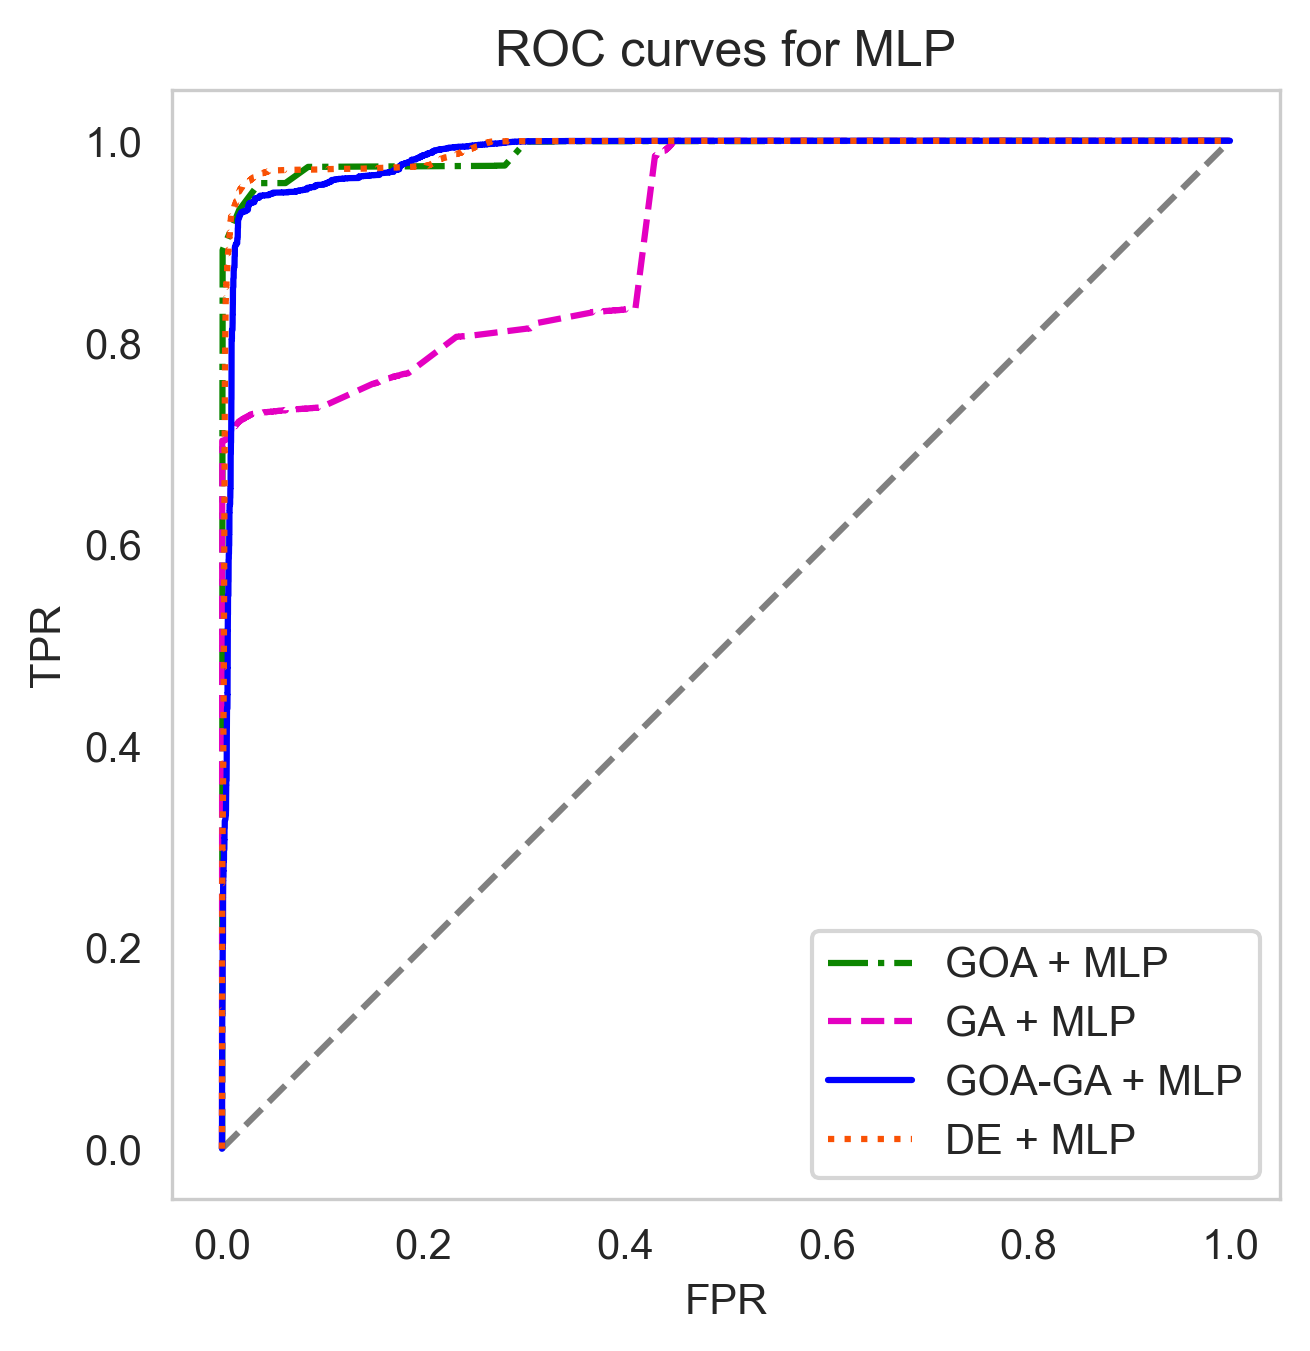

In [43]:
# Plotting the ROC-AUC curve for all the 4 approaches using MLP

# Compute aggregate true positive and false positive counts
n_classes = len(le.classes_)
y_test_one_hot = label_binarize(y_test_numeric, classes=range(n_classes))

y_score_mlp_GOA = mlp_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])
MLP_GOA_fpr, MLP_GOA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_mlp_GOA.ravel())

y_score_mlp_GA = mlp_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])
MLP_GA_fpr, MLP_GA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_mlp_GA.ravel())

y_score_mlp_GOAGA = mlp_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])
MLP_GOAGA_fpr, MLP_GOAGA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_mlp_GOAGA.ravel())

y_score_mlp_DE = mlp_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])
MLP_DE_fpr, MLP_DE_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_mlp_DE.ravel())

# Plot ROC curves
plt.plot([0, 1], [0, 1], "k--", color='gray')
plt.plot(MLP_GOA_fpr, MLP_GOA_tpr, linestyle='dashdot', color ='#0C8500',  label='GOA + MLP')
plt.plot(MLP_GA_fpr, MLP_GA_tpr, linestyle='dashed', color ='#E400C1', label='GA + MLP')
plt.plot(MLP_GOAGA_fpr, MLP_GOAGA_tpr, linestyle='solid', color='blue', label='GOA-GA + MLP')
plt.plot(MLP_DE_fpr, MLP_DE_tpr, linestyle='dotted', color='#F95105', label='DE + MLP')

# Add title, axis labels, and legend
plt.title('ROC curves for MLP')
plt.axis("square")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# remove the gridlines
plt.grid(False)

plt.show()

2. Testing for Logistic Regression (LR) algorithm

In [44]:
# Make predictions on the test set for LR-GOA

y_pred_GOA = lr_GOA.predict(X_test.iloc[:, top_features_indices_GOA])

print(classification_report(y_test, y_pred_GOA, zero_division=1, target_names=lr_GOA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOA_numeric = le.transform(y_pred_GOA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, lr_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, lr_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_LR_GOA = auc_weighted
LR_GOA_fpr = dict()
LR_GOA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    LR_GOA_fpr[i], LR_GOA_tpr[i], _ = roc_curve(y_test_numeric, lr_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])[:, i], pos_label=i)
    roc_auc[i] = auc(LR_GOA_fpr[i], LR_GOA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOA_numeric, squared=False))


              precision    recall  f1-score   support

   Blackhole     0.4750    0.0188    0.0361      2024
    Flooding     0.9109    0.9970    0.9520       656
    Grayhole     0.3765    0.9950    0.5463      3002
      Normal     0.9987    0.9728    0.9856     67965
        TDMA     1.0000    0.0000    0.0000      1286

    accuracy                         0.9315     74933
   macro avg     0.7522    0.5967    0.5040     74933
weighted avg     0.9589    0.9315    0.9252     74933

Macro AUC: 0.9455687871595503
Weighted AUC: 0.977172859284517
Class-wise AUC: {0: 0.9594113326174049, 1: 0.9995526386561575, 2: 0.9654457861854082, 3: 0.9809303407837305, 4: 0.8225038375550502}
RMSE: 0.44971918010901246


In [45]:
# Make predictions on the test set for LR-GA

y_pred_GA = lr_GA.predict(X_test.iloc[:, selected_features_indices_GA])

print(classification_report(y_test, y_pred_GA, zero_division=1, target_names=lr_GA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GA_numeric = le.transform(y_pred_GA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, lr_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, lr_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_LR_GA = auc_weighted
LR_GA_fpr = dict()
LR_GA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    LR_GA_fpr[i], LR_GA_tpr[i], _ = roc_curve(y_test_numeric, lr_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])[:, i], pos_label=i)
    roc_auc[i] = auc(LR_GA_fpr[i], LR_GA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.1815    0.0707    0.1017      2024
    Flooding     0.0826    0.4146    0.1378       656
    Grayhole     0.5038    0.7805    0.6123      3002
      Normal     0.9987    0.9728    0.9856     67965
        TDMA     1.0000    0.0000    0.0000      1286

    accuracy                         0.9192     74933
   macro avg     0.5533    0.4477    0.3675     74933
weighted avg     0.9488    0.9192    0.9225     74933

Macro AUC: 0.873523453750586
Weighted AUC: 0.9666130930584262
Class-wise AUC: {0: 0.9660781013388449, 1: 0.9577843418686217, 2: 0.9785490723672738, 3: 0.9752052577713778, 4: 0.49000049540681223}
RMSE: 0.5784510186573109


In [46]:
# Make predictions on the test set for LR-GOAGA

y_pred_GOAGA = lr_GOAGA.predict(X_test.iloc[:, top_4_indices_GOAGA])

print(classification_report(y_test, y_pred_GOAGA, zero_division=1, target_names=lr_GOAGA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOAGA_numeric = le.transform(y_pred_GOAGA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, lr_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, lr_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_LR_GOAGA = auc_weighted
LR_GOAGA_fpr = dict()
LR_GOAGA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    LR_GOAGA_fpr[i], LR_GOAGA_tpr[i], _ = roc_curve(y_test_numeric, lr_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])[:, i], pos_label=i)
    roc_auc[i] = auc(LR_GOAGA_fpr[i], LR_GOAGA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOAGA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.5050    0.8696    0.6390      2024
    Flooding     0.1659    0.7012    0.2683       656
    Grayhole     0.1358    0.3068    0.1883      3002
      Normal     0.9986    0.8523    0.9197     67965
        TDMA     0.0615    0.1858    0.0924      1286

    accuracy                         0.8182     74933
   macro avg     0.3734    0.5832    0.4215     74933
weighted avg     0.9274    0.8182    0.8629     74933

Macro AUC: 0.8565416795112315
Weighted AUC: 0.9458649200226782
Class-wise AUC: {0: 0.9864306658844907, 1: 0.9760073080101939, 2: 0.8858401744302462, 3: 0.9558591173548416, 4: 0.47857113187638534}
RMSE: 0.6947838277335646


In [47]:
# Make predictions on the test set for LR-DE

y_pred_DE = lr_DE.predict(X_test.iloc[:, top_4_indices_DE])

print(classification_report(y_test, y_pred_DE, zero_division=1, target_names=lr_DE.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_DE_numeric = le.transform(y_pred_DE)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, lr_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, lr_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_LR_DE = auc_weighted
LR_DE_fpr = dict()
LR_DE_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    LR_DE_fpr[i], LR_DE_tpr[i], _ = roc_curve(y_test_numeric, lr_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])[:, i], pos_label=i)
    roc_auc[i] = auc(LR_DE_fpr[i], LR_DE_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_DE_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.4049    0.8967    0.5579      2024
    Flooding     0.3401    0.8201    0.4808       656
    Grayhole     0.3353    0.1719    0.2273      3002
      Normal     0.9987    0.9729    0.9856     67965
        TDMA     1.0000    0.8717    0.9314      1286

    accuracy                         0.9357     74933
   macro avg     0.6158    0.7467    0.6366     74933
weighted avg     0.9503    0.9357    0.9383     74933

Macro AUC: 0.9750040997303488
Weighted AUC: 0.9829913979440854
Class-wise AUC: {0: 0.9867487840302522, 1: 0.9900878821432102, 2: 0.9725581012657302, 3: 0.9840555965482672, 4: 0.9415701346642841}
RMSE: 0.48203136459283413


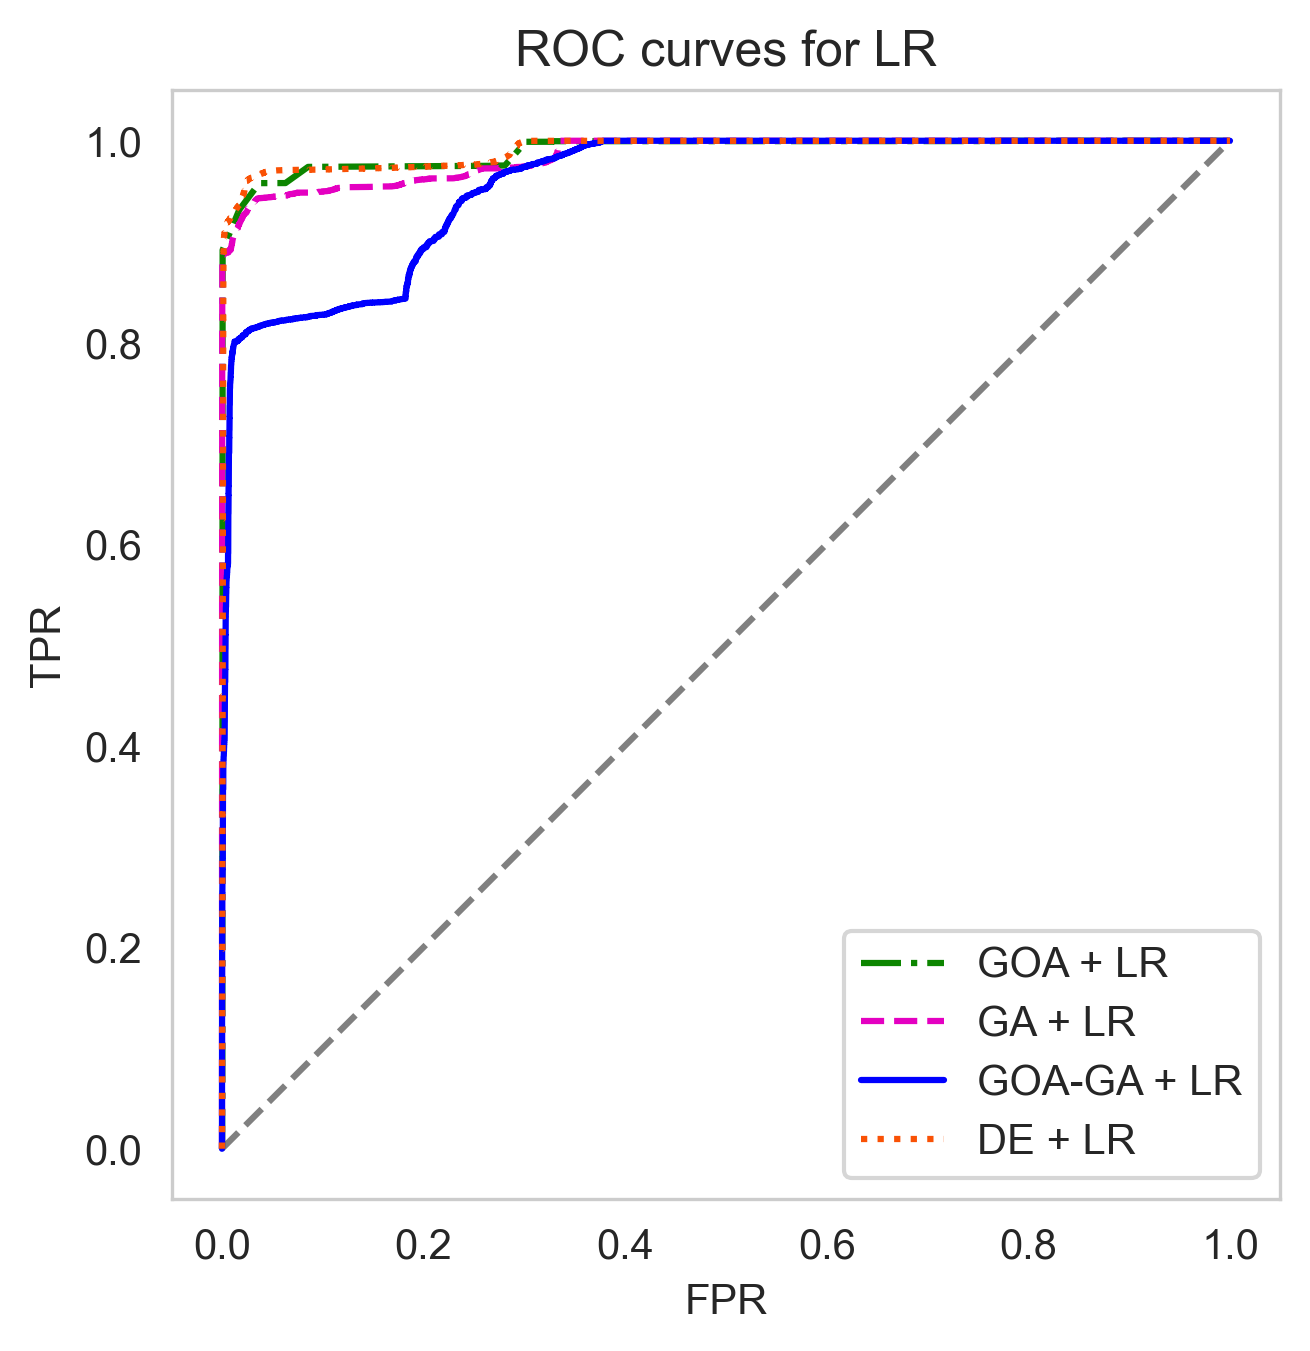

In [48]:
# Plotting the ROC-AUC curve for all the 4 approaches using LR

# Compute aggregate true positive and false positive counts
n_classes = len(le.classes_)
y_test_one_hot = label_binarize(y_test_numeric, classes=range(n_classes))

y_score_lr_GOA = lr_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])
LR_GOA_fpr, LR_GOA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_lr_GOA.ravel())

y_score_lr_GA = lr_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])
LR_GA_fpr, LR_GA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_lr_GA.ravel())

y_score_lr_GOAGA = lr_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])
LR_GOAGA_fpr, LR_GOAGA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_lr_GOAGA.ravel())

y_score_lr_DE = lr_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])
LR_DE_fpr, LR_DE_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_lr_DE.ravel())

# Plot ROC curves
plt.plot([0, 1], [0, 1], "k--", color='gray')
plt.plot(LR_GOA_fpr, LR_GOA_tpr, linestyle='dashdot', color ='#0C8500',  label='GOA + LR')
plt.plot(LR_GA_fpr, LR_GA_tpr, linestyle='dashed', color ='#E400C1', label='GA + LR')
plt.plot(LR_GOAGA_fpr, LR_GOAGA_tpr, linestyle='solid', color='blue', label='GOA-GA + LR')
plt.plot(LR_DE_fpr, LR_DE_tpr, linestyle='dotted', color='#F95105', label='DE + LR')

# Add title, axis labels, and legend
plt.title('ROC curves for LR')
plt.axis("square")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# remove the gridlines
plt.grid(False)

plt.show()

3. Testing for Decision Tree (CART) algorithm

In [49]:
# Make predictions on the test set for CART-GOA

y_pred_GOA = dt_GOA.predict(X_test.iloc[:, top_features_indices_GOA])

print(classification_report(y_test, y_pred_GOA, zero_division=1, target_names=dt_GOA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOA_numeric = le.transform(y_pred_GOA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, dt_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, dt_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_DT_GOA = auc_weighted
DT_GOA_fpr = dict()
DT_GOA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    DT_GOA_fpr[i], DT_GOA_tpr[i], _ = roc_curve(y_test_numeric, dt_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])[:, i], pos_label=i)
    roc_auc[i] = auc(DT_GOA_fpr[i], DT_GOA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.4750    0.0188    0.0361      2024
    Flooding     0.9109    0.9970    0.9520       656
    Grayhole     0.3765    0.9950    0.5463      3002
      Normal     0.9987    0.9728    0.9856     67965
        TDMA     1.0000    0.0000    0.0000      1286

    accuracy                         0.9315     74933
   macro avg     0.7522    0.5967    0.5040     74933
weighted avg     0.9589    0.9315    0.9252     74933

Macro AUC: 0.9456022969664273
Weighted AUC: 0.9773315198628718
Class-wise AUC: {0: 0.9594113326174049, 1: 0.9995451887906739, 2: 0.9654457861854082, 3: 0.9811053396835999, 4: 0.8225038375550502}
RMSE: 0.44971918010901246


In [50]:
# Make predictions on the test set for CART-GA
y_pred_GA = dt_GA.predict(X_test.iloc[:, selected_features_indices_GA])

print(classification_report(y_test, y_pred_GA, target_names=dt_GA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GA_numeric = le.transform(y_pred_GA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, dt_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, dt_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_DT_GA = auc_weighted
DT_GA_fpr = dict()
DT_GA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    DT_GA_fpr[i], DT_GA_tpr[i], _ = roc_curve(y_test_numeric, dt_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])[:, i], pos_label=i)
    roc_auc[i] = auc(DT_GA_fpr[i], DT_GA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.2799    0.2866    0.2832      2024
    Flooding     0.2186    0.7622    0.3398       656
    Grayhole     0.4153    0.4174    0.4163      3002
      Normal     0.9984    0.9553    0.9764     67965
        TDMA     0.0943    0.1851    0.1250      1286

    accuracy                         0.9008     74933
   macro avg     0.4013    0.5213    0.4281     74933
weighted avg     0.9333    0.9008    0.9150     74933

Macro AUC: 0.9236563610466796
Weighted AUC: 0.9665465154413796
Class-wise AUC: {0: 0.8665251541027077, 1: 0.9778854129417343, 2: 0.914270903871892, 3: 0.9732419954621405, 4: 0.8863583388549231}
RMSE: 0.6538362957949421


In [51]:
# Make predictions on the test set for CART-GOAGA
y_pred_GOAGA = dt_GOAGA.predict(X_test.iloc[:, top_4_indices_GOAGA])

print(classification_report(y_test, y_pred_GOAGA, target_names=dt_GOAGA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOAGA_numeric = le.transform(y_pred_GOAGA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, dt_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, dt_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_DT_GOAGA = auc_weighted
DT_GOAGA_fpr = dict()
DT_GOAGA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    DT_GOAGA_fpr[i], DT_GOAGA_tpr[i], _ = roc_curve(y_test_numeric, dt_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])[:, i], pos_label=i)
    roc_auc[i] = auc(DT_GOAGA_fpr[i], DT_GOAGA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOAGA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.5304    0.7105    0.6074      2024
    Flooding     0.2335    0.8902    0.3700       656
    Grayhole     0.8199    0.6339    0.7150      3002
      Normal     0.9973    0.9328    0.9639     67965
        TDMA     0.2223    0.6625    0.3329      1286

    accuracy                         0.9098     74933
   macro avg     0.5607    0.7660    0.5978     74933
weighted avg     0.9576    0.9098    0.9283     74933

Macro AUC: 0.9549625939746316
Weighted AUC: 0.9842855574827895
Class-wise AUC: {0: 0.957800903552032, 1: 0.9647271136848652, 2: 0.9794431763114164, 3: 0.9873461918122746, 4: 0.8854955845125694}
RMSE: 0.594044258002058


In [52]:
# Make predictions on the test set for CART-DE
y_pred_DE = dt_DE.predict(X_test.iloc[:, top_4_indices_DE])

print(classification_report(y_test, y_pred_DE, target_names=dt_DE.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_DE_numeric = le.transform(y_pred_DE)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, dt_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, dt_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_DT_DE = auc_weighted
DT_DE_fpr = dict()
DT_DE_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    DT_DE_fpr[i], DT_DE_tpr[i], _ = roc_curve(y_test_numeric, dt_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])[:, i], pos_label=i)
    roc_auc[i] = auc(DT_DE_fpr[i], DT_DE_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_DE_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.7562    0.9224    0.8311      2024
    Flooding     0.3932    0.7912    0.5253       656
    Grayhole     0.7906    0.8714    0.8290      3002
      Normal     0.9984    0.9014    0.9474     67965
        TDMA     0.1804    0.9075    0.3010      1286

    accuracy                         0.8999     74933
   macro avg     0.6237    0.8788    0.6868     74933
weighted avg     0.9642    0.8999    0.9247     74933

Macro AUC: 0.9285813696706562
Weighted AUC: 0.9423547383620832
Class-wise AUC: {0: 0.9592597311327017, 1: 0.8901843958688587, 2: 0.9325588073980624, 3: 0.943255012478142, 4: 0.9176489014755161}
RMSE: 0.4278202585453017


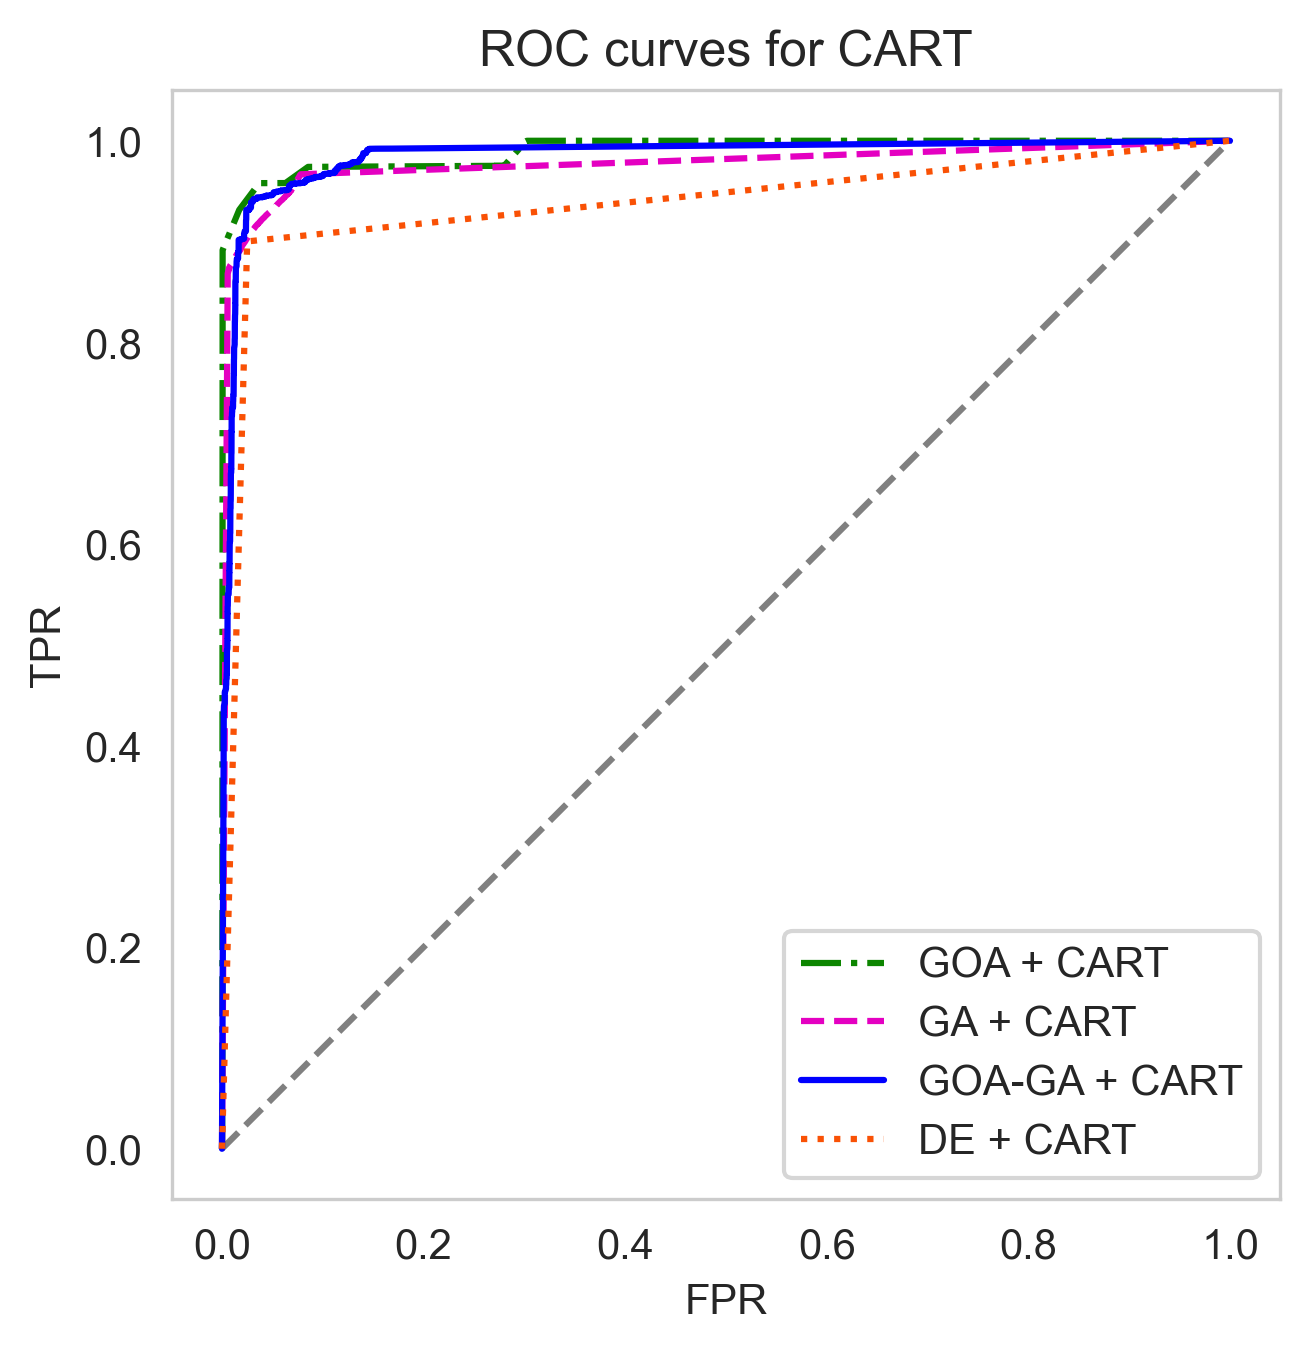

In [53]:
# Plotting the ROC-AUC curve for all the 4 approaches using CART

# Compute aggregate true positive and false positive counts
n_classes = len(le.classes_)
y_test_one_hot = label_binarize(y_test_numeric, classes=range(n_classes))

y_score_dt_GOA = dt_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])
DT_GOA_fpr, DT_GOA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_dt_GOA.ravel())

y_score_dt_GA = dt_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])
DT_GA_fpr, DT_GA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_dt_GA.ravel())

y_score_dt_GOAGA = dt_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])
DT_GOAGA_fpr, DT_GOAGA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_dt_GOAGA.ravel())

y_score_dt_DE = dt_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])
DT_DE_fpr, DT_DE_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_dt_DE.ravel())

# Plot ROC curves
plt.plot([0, 1], [0, 1], "k--", color='gray')
plt.plot(DT_GOA_fpr, DT_GOA_tpr, linestyle='dashdot', color ='#0C8500',  label='GOA + CART')
plt.plot(DT_GA_fpr, DT_GA_tpr, linestyle='dashed', color ='#E400C1', label='GA + CART')
plt.plot(DT_GOAGA_fpr, DT_GOAGA_tpr, linestyle='solid', color='blue', label='GOA-GA + CART')
plt.plot(DT_DE_fpr, DT_DE_tpr, linestyle='dotted', color='#F95105', label='DE + CART')

# Add title, axis labels, and legend
plt.title('ROC curves for CART')
plt.axis("square")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# remove the gridlines
plt.grid(False)

plt.show()

4. Testing for K-Nearest Neighbors (KNN) algorithm

In [77]:
# Make predictions on the test set for KNN-GOA
y_pred_GOA = knn_GOA.predict(X_test.iloc[:, top_features_indices_GOA])

print(classification_report(y_test, y_pred_GOA, zero_division=1, target_names=knn_GOA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOA_numeric = le.transform(y_pred_GOA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, knn_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, knn_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_KNN_GOA = auc_weighted
KNN_GOA_fpr = dict()
KNN_GOA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    KNN_GOA_fpr[i], KNN_GOA_tpr[i], _ = roc_curve(y_test_numeric, knn_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])[:, i], pos_label=i)
    roc_auc[i] = auc(KNN_GOA_fpr[i], KNN_GOA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.2503    0.9812    0.3989      2024
    Flooding     0.9142    0.9101    0.9121       656
    Grayhole     1.0000    0.0000    0.0000      3002
      Normal     0.9971    0.9734    0.9851     67965
        TDMA     1.0000    0.0000    0.0000      1286

    accuracy                         0.9173     74933
   macro avg     0.8323    0.5729    0.4592     74933
weighted avg     0.9764    0.9173    0.9122     74933

Macro AUC: 0.9644071562560768
Weighted AUC: 0.978179879676315
Class-wise AUC: {0: 0.958445173438089, 1: 0.9981282059049235, 2: 0.9631214956712671, 3: 0.9803024438610303, 4: 0.9220384624050741}
RMSE: 0.7993982363018953


In [78]:
# Make predictions on the test set for KNN-GA
y_pred_GA = knn_GA.predict(X_test.iloc[:, selected_features_indices_GA])

print(classification_report(y_test, y_pred_GA, zero_division=1, target_names=knn_GA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GA_numeric = le.transform(y_pred_GA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, knn_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, knn_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_KNN_GA = auc_weighted
KNN_GA_fpr = dict()
KNN_GA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    KNN_GA_fpr[i], KNN_GA_tpr[i], _ = roc_curve(y_test_numeric, knn_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])[:, i], pos_label=i)
    roc_auc[i] = auc(KNN_GA_fpr[i], KNN_GA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.2095    0.4788    0.2915      2024
    Flooding     0.3704    0.5534    0.4438       656
    Grayhole     0.3634    0.3245    0.3428      3002
      Normal     0.9893    0.9211    0.9540     67965
        TDMA     0.0347    0.0910    0.0503      1286

    accuracy                         0.8678     74933
   macro avg     0.3935    0.4737    0.4165     74933
weighted avg     0.9214    0.8678    0.8916     74933

Macro AUC: 0.8413389000455714
Weighted AUC: 0.947966333589484
Class-wise AUC: {0: 0.8455491304418302, 1: 0.904866387586086, 2: 0.8251801098230279, 3: 0.9621349097170716, 4: 0.6689639626598413}
RMSE: 0.751681285817467


In [79]:
# Make predictions on the test set for KNN-GOAGA

y_pred_GOAGA = knn_GOAGA.predict(X_test.iloc[:, top_4_indices_GOAGA])

print(classification_report(y_test, y_pred_GOAGA, zero_division=1, target_names=knn_GOAGA.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_GOAGA_numeric = le.transform(y_pred_GOAGA)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, knn_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, knn_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_KNN_GOAGA = auc_weighted
KNN_GOAGA_fpr = dict()
KNN_GOAGA_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    KNN_GOAGA_fpr[i], KNN_GOAGA_tpr[i], _ = roc_curve(y_test_numeric, knn_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])[:, i], pos_label=i)
    roc_auc[i] = auc(KNN_GOAGA_fpr[i], KNN_GOAGA_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_GOAGA_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.5226    0.5707    0.5456      2024
    Flooding     0.2396    0.2195    0.2291       656
    Grayhole     0.7697    0.7392    0.7541      3002
      Normal     0.9902    0.9906    0.9904     67965
        TDMA     0.5798    0.5622    0.5709      1286

    accuracy                         0.9551     74933
   macro avg     0.6204    0.6164    0.6180     74933
weighted avg     0.9552    0.9551    0.9551     74933

Macro AUC: 0.9292926507708625
Weighted AUC: 0.9733731786317807
Class-wise AUC: {0: 0.9413569656679068, 1: 0.8525153926945183, 2: 0.9676925054139205, 3: 0.9769826117278742, 4: 0.9079157783500929}
RMSE: 0.527037132978301


In [80]:
# Make predictions on the test set for KNN-DE

y_pred_DE = knn_DE.predict(X_test.iloc[:, top_4_indices_DE])

print(classification_report(y_test, y_pred_DE, zero_division=1, target_names=knn_DE.classes_, digits=4))

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_DE_numeric = le.transform(y_pred_DE)

n_classes = len(le.classes_)
auc_macro = roc_auc_score(y_test_numeric, knn_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="macro", multi_class="ovr")
auc_weighted = roc_auc_score(y_test_numeric, knn_DE.predict_proba(X_test.iloc[:, top_4_indices_DE]), average="weighted", multi_class="ovr")
print("Macro AUC:", auc_macro)
print("Weighted AUC:", auc_weighted)
auc_KNN_DE = auc_weighted
KNN_DE_fpr = dict()
KNN_DE_tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    KNN_DE_fpr[i], KNN_DE_tpr[i], _ = roc_curve(y_test_numeric, knn_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])[:, i], pos_label=i)
    roc_auc[i] = auc(KNN_DE_fpr[i], KNN_DE_tpr[i])
    
print("Class-wise AUC:", roc_auc)
print("RMSE:", mean_squared_error(y_test_numeric, y_pred_DE_numeric, squared=False))

              precision    recall  f1-score   support

   Blackhole     0.7514    0.9244    0.8290      2024
    Flooding     0.3777    0.8216    0.5175       656
    Grayhole     0.7947    0.8831    0.8365      3002
      Normal     0.9987    0.9163    0.9557     67965
        TDMA     0.2175    0.9005    0.3503      1286

    accuracy                         0.9141     74933
   macro avg     0.6280    0.8892    0.6978     74933
weighted avg     0.9650    0.9141    0.9333     74933

Macro AUC: 0.9687262353057186
Weighted AUC: 0.9818899825261554
Class-wise AUC: {0: 0.9759316658857375, 1: 0.9551057560739185, 2: 0.9758608838170482, 3: 0.9831274336431182, 4: 0.9536054371087703}
RMSE: 0.41730352709843915


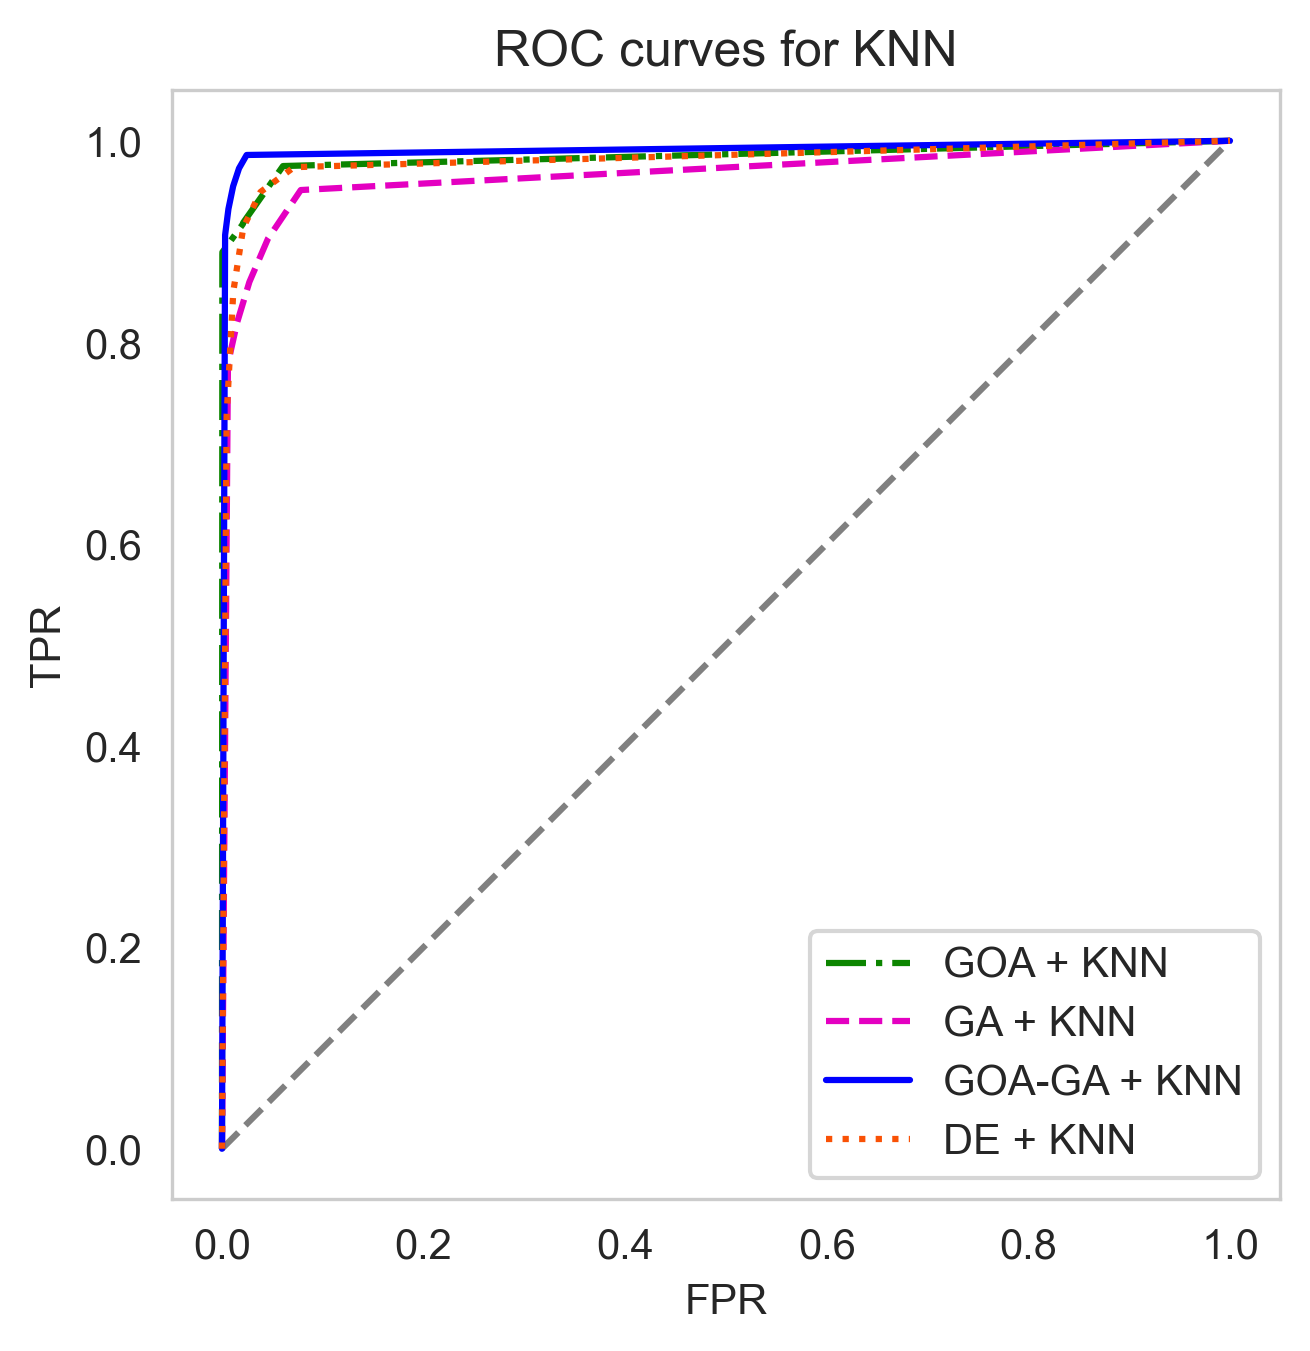

In [81]:
# Plotting the ROC-AUC curve for all the 4 approaches using KNN

# Compute aggregate true positive and false positive counts
n_classes = len(le.classes_)
y_test_one_hot = label_binarize(y_test_numeric, classes=range(n_classes))

y_score_knn_GOA = knn_GOA.predict_proba(X_test.iloc[:, top_features_indices_GOA])
KNN_GOA_fpr, KNN_GOA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_knn_GOA.ravel())

y_score_knn_GA = knn_GA.predict_proba(X_test.iloc[:, selected_features_indices_GA])
KNN_GA_fpr, KNN_GA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_knn_GA.ravel())

y_score_knn_GOAGA = knn_GOAGA.predict_proba(X_test.iloc[:, top_4_indices_GOAGA])
KNN_GOAGA_fpr, KNN_GOAGA_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_knn_GOAGA.ravel())

y_score_knn_DE = knn_DE.predict_proba(X_test.iloc[:, top_4_indices_DE])
KNN_DE_fpr, KNN_DE_tpr, _ = roc_curve(y_test_one_hot.ravel(), y_score_knn_DE.ravel())

# Plot ROC curves
plt.plot([0, 1], [0, 1], "k--", color='gray')
plt.plot(KNN_GOA_fpr, KNN_GOA_tpr, linestyle='dashdot', color ='#0C8500',  label='GOA + KNN')
plt.plot(KNN_GA_fpr, KNN_GA_tpr, linestyle='dashed', color ='#E400C1', label='GA + KNN')
plt.plot(KNN_GOAGA_fpr, KNN_GOAGA_tpr, linestyle='solid', color='blue', label='GOA-GA + KNN')
plt.plot(KNN_DE_fpr, KNN_DE_tpr, linestyle='dotted', color='#F95105', label='DE + KNN')

# Add title, axis labels, and legend
plt.title('ROC curves for KNN')
plt.axis("square")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# remove the gridlines
plt.grid(False)

plt.show()

#### END OF PROJECT